In [1]:
import sys
sys.path.insert(0, "HelperFunctions")

from UNetModels import UNet
from PlotLearningModels import plotLoss
from LossFunctions import dice_coef_loss, dice_coef
from GenerateTrainingDataSingleChannel import CreateTrainingData, getTrainingTiles
import numpy as np

/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
ImageDirectory = '/Users/aimachine/Documents/OzgaDeepLearning/images/'
MaskDirectory = '/Users/aimachine/Documents/OzgaDeepLearning/masks/'

Input_Channels = 1
Output_Channels = 1
batchsize = 8
epochs = 40
reload = False
##size of image patches for training 
## note: must be divisible by 32 for UNet 

PATCH_HEIGHT, PATCH_WIDTH = 128,128
Num_Samples = 1


Zero padding all images to the max size found:  2048 2048


HelperFunctions/Normalize.py:48: UserWarning: Converting data type from 'float64' to ImageJ-compatible 'float32'.
  warnings.warn("Converting data type from '%s' to ImageJ-compatible '%s'." % (t, np.dtype(t_new)))
HelperFunctions/Normalize.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x = x[slices]
HelperFunctions/Normalize.py:48: UserWarning: Converting data type from 'int64' to ImageJ-compatible 'int16'.
  warnings.warn("Converting data type from '%s' to ImageJ-compatible '%s'." % (t, np.dtype(t_new)))


(80, 2048, 2048, 1)


Augment training data, meaning create more images from the given input images (optional block)

In [ ]:
AugmentImages(ImageDirectory, MaskDirectory)

Load the training data

In [ ]:

rankfourX, rankfourY = LoadTrainingData(ImageDirectory, MaskDirectory)


X, Y = getTrainingTiles(rankfourX, rankfourY,PATCH_HEIGHT,PATCH_WIDTH, Num_Samples)

In [3]:
from sklearn.model_selection import train_test_split
x_validation, x_train, y_validation, y_train = train_test_split(X, Y, test_size=.8)
print('Training on input tensor: {}'.format(x_train.shape))
print('Validating on input tensor: {}'.format(x_validation.shape))


X training: (64, 128, 128, 1)
X validation: (16, 128, 128, 1)
Y training: (64, 128, 128, 1)
Y validation: (16, 128, 128, 1)


/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


<Figure size 432x288 with 0 Axes>

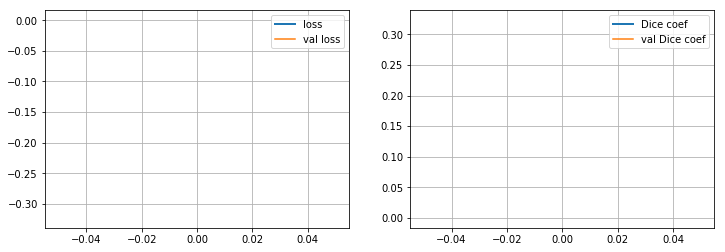

Epoch 2/40
56/64 [=========================>....] - ETA: 10s - loss: -0.2603 - dice_coef: 0.2603

KeyboardInterrupt: 

In [4]:
model_unet = UNet(n_input_channels=Input_Channels, n_output_channels=Output_Channels)
model_unet.compile(optimizer='adam', loss=dice_coef_loss, metrics=[dice_coef])
history_unet = model_unet.fit(x_train, y_train, batch_size=batchsize, epochs=epochs, 
                    verbose=1, shuffle=True, 
                    validation_data=(x_validation, y_validation),
                    callbacks=[plotLoss])